In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

F:\Anaconda1\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataold = pd.read_csv(r"./traj.csv",index_col = 0)

In [3]:
# 分解坐标字段
def split_coordinates(coord_str):
    coord = eval(coord_str)
    return coord[0], coord[1]

# 解析字符串为 datetime
dataold['timestamp_column'] = pd.to_datetime(dataold['time'])

# 转换为 Unix 时间戳（单位为秒）
dataold['unix_timestamp'] = dataold['timestamp_column'].astype('int64') // 10**9
#print(data)
# 分解坐标
dataold[['longitude', 'latitude']] = dataold['coordinates'].apply(lambda x: pd.Series(split_coordinates(x)))

# 特征和标签的选择依赖于你的具体数据和任务
#X = data[['entity_id', 'longitude', 'latitude', 'current_dis', 'speeds','holidays']]  # 特征
#y = data[['latitude', 'longitude']]  # 预测目标，例如经纬度


In [4]:
data = dataold.drop(['coordinates', 'timestamp_column', 'time'], axis=1)

In [5]:
# 标准化数据
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['longitude', 'latitude']])

In [6]:
# 同时对经度和纬度列下移一行
data['prev_longitude'] = data['longitude'].shift(1)
data['prev_latitude'] = data['latitude'].shift(1)
data['prev_dis'] = data['current_dis']
data['prev_id'] = data['traj_id']

data.dropna(inplace=True)  # 移除由于shift造成的缺失值行
data = data[data['prev_id'] == data['traj_id']]
import numpy as np

# 计算欧几里得距离并添加为新列'distance'
data['distance'] = np.sqrt(((data['longitude']-data['prev_longitude'])**2) + ((data['latitude']-data['prev_latitude'])**2))


data


,entity_id,traj_id,current_dis,speeds,holidays,unix_timestamp,longitude,latitude,prev_longitude,prev_latitude,prev_dis,prev_id,distance
id,,,,,,,,,,,,,
1,254,0,0.562623,24.5375,0,1381254405,116.315102,40.004784,116.318726,40.009014,0.562623,0,0.005570
2,254,0,0.778695,31.9675,0,1381254459,116.315018,40.002842,116.315102,40.004784,0.778695,0,0.001944
3,254,0,1.252148,19.7850,0,1381254566,116.315041,39.998585,116.315018,40.002842,1.252148,0,0.004257
4,254,0,1.924533,24.4500,0,1381254675,116.315605,39.992554,116.315041,39.998585,1.924533,0,0.006057
5,254,0,2.448189,25.1500,0,1381254729,116.315735,39.987846,116.315605,39.992554,2.448189,0,0.004710
...,...,...,...,...,...,...,...,...,...,...,...,...,...
518403,4954,21998,21.419211,27.1450,0,1383174875,116.333366,39.790730,116.335815,39.790680,21.419211,21998,0.002450
518404,4954,21998,21.669183,30.0825,0,1383174899,116.330444,39.790840,116.333366,39.790730,21.669183,21998,0.002924
518405,4954,21998,22.129037,46.0550,0,1383174995,116.328453,39.793888,116.330444,39.790840,22.129037,21998,0.003641


In [7]:

# 使用多个特征进行聚类
feature = data[['longitude', 'latitude','distance','speeds','unix_timestamp']]# 'traj_id', ,'prev_longitude', 'prev_latitude','speeds','unix_timestamp','current_dis','prev_dis'
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
cluster_labels = kmeans.fit_predict(feature)


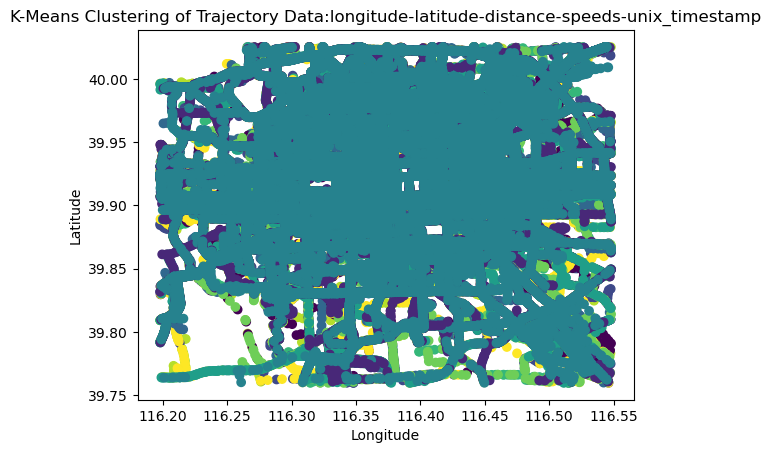

In [8]:
import matplotlib.pyplot as plt

plt.scatter(data['longitude'], data['latitude'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of Trajectory Data:longitude-latitude-distance-speeds-unix_timestamp')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
silhouette_avg = silhouette_score(data, cluster_labels)
ch_score = calinski_harabasz_score(data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: 0.5734188562338911
Calinski-Harabasz Index: 5201039.425508632


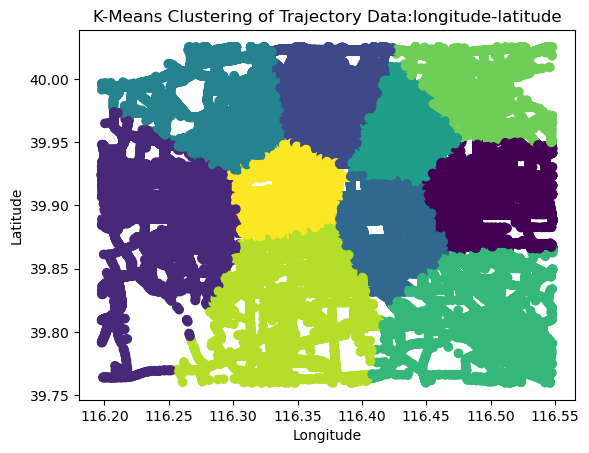

In [10]:

# 使用多个特征进行聚类
feature = data[['longitude', 'latitude']]# 'traj_id', ,'prev_longitude', 'prev_latitude','speeds','unix_timestamp','current_dis','prev_dis'
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
cluster_labels = kmeans.fit_predict(feature)




import matplotlib.pyplot as plt
plt.scatter(data['longitude'], data['latitude'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of Trajectory Data:longitude-latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
silhouette_avg = silhouette_score(data, cluster_labels)
ch_score = calinski_harabasz_score(data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: -0.030622951320570115
Calinski-Harabasz Index: 41.535024236746644


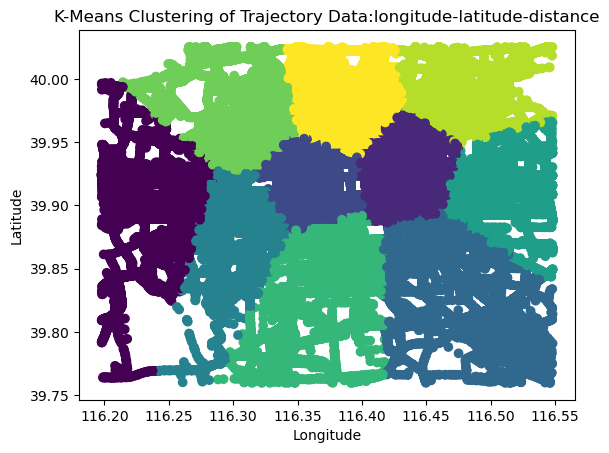

In [12]:

# 使用多个特征进行聚类
feature = data[['longitude', 'latitude','distance']]# 'traj_id', ,'prev_longitude', 'prev_latitude','speeds','unix_timestamp','current_dis','prev_dis'
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
cluster_labels = kmeans.fit_predict(feature)




import matplotlib.pyplot as plt
plt.scatter(data['longitude'], data['latitude'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of Trajectory Data:longitude-latitude-distance')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [13]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
silhouette_avg = silhouette_score(data, cluster_labels)
ch_score = calinski_harabasz_score(data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: -0.031183361854861404
Calinski-Harabasz Index: 35.574787508162544


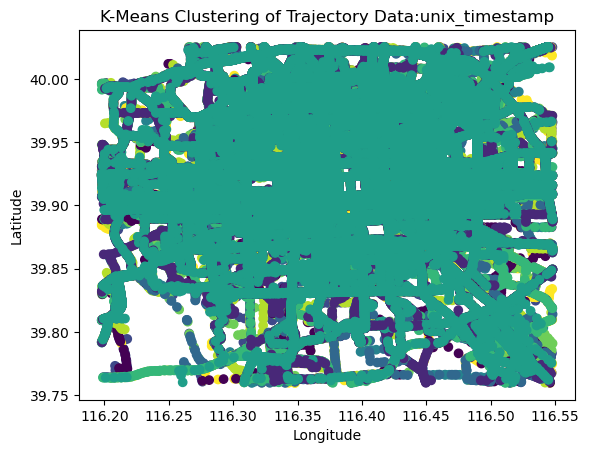

In [14]:

# 使用多个特征进行聚类
feature = data[['unix_timestamp']]# 'longitude', 'latitude','distance''traj_id', ,'prev_longitude', 'prev_latitude','speeds','unix_timestamp','current_dis','prev_dis'
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
cluster_labels = kmeans.fit_predict(feature)




import matplotlib.pyplot as plt
plt.scatter(data['longitude'], data['latitude'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of Trajectory Data:unix_timestamp')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
silhouette_avg = silhouette_score(data, cluster_labels)
ch_score = calinski_harabasz_score(data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: 0.5716727786468034
Calinski-Harabasz Index: 5199244.953463549


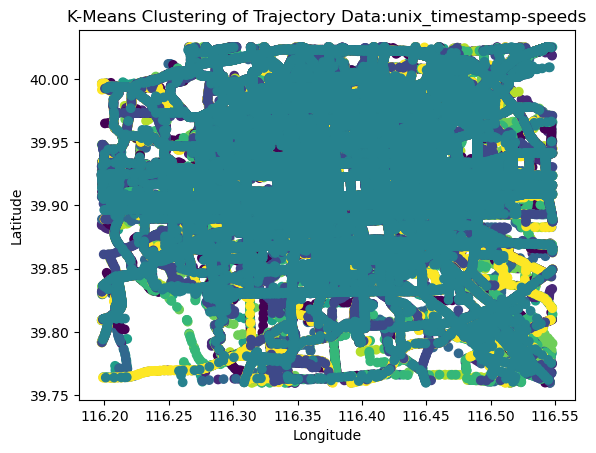

In [16]:

# 使用多个特征进行聚类
feature = data[['unix_timestamp','speeds']]# 'longitude', 'latitude','distance''traj_id', ,'prev_longitude', 'prev_latitude','speeds','unix_timestamp','current_dis','prev_dis'
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
cluster_labels = kmeans.fit_predict(feature)




import matplotlib.pyplot as plt
plt.scatter(data['longitude'], data['latitude'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of Trajectory Data:unix_timestamp-speeds')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
silhouette_avg = silhouette_score(data, cluster_labels)
ch_score = calinski_harabasz_score(data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: 0.5729891528089284
Calinski-Harabasz Index: 5201649.144515291


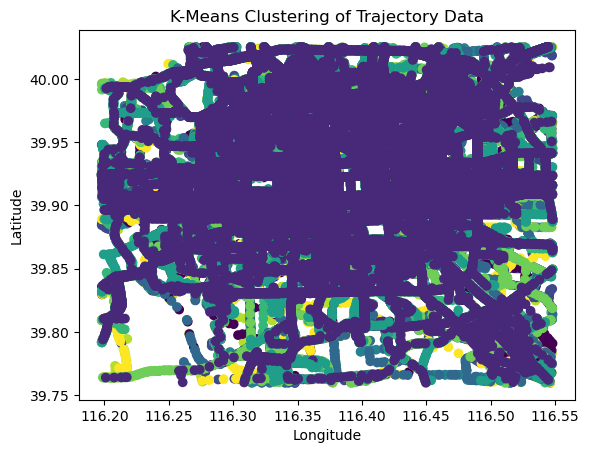

In [18]:

# 使用多个特征进行聚类

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
cluster_labels = kmeans.fit_predict(data)




import matplotlib.pyplot as plt
plt.scatter(data['longitude'], data['latitude'], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of Trajectory Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
silhouette_avg = silhouette_score(data, cluster_labels)
ch_score = calinski_harabasz_score(data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: 0.5732411812425178
Calinski-Harabasz Index: 5202091.042274649


In [ ]:
#轮廓系数度量了聚类的紧密度和分离度，范围在-1到1之间。Silhouette Score
#较高的轮廓系数表示样本更密集地聚集在其自身的簇中，并且与其他簇相对分离。
#通常，轮廓系数越接近1表示聚类效果越好。
#CH指数考虑了簇内的紧密度和簇间的分离度，越高表示聚类效果越好